# HW2 - Basic Data Processing for Data Mining

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 5/24 (Thur)  11:59 AM 

------------------------------------------
## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

### CHECK YOUR PYTHON VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [2]:
import sys
sys.version

'3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'

## Python Assingment HW2 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- The necessary libraries are already imported below.
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

In [3]:
%matplotlib inline 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem1. Web Crawling & Processing

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_2016_Summer_Olympics_medal_winners"

url_info = requests.get(url)
#print (url_info.text)


### Problem 1-1 Fetching the Wikipedia site

#### print html code of presented page
#### Use requests library
> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>List of 2016 Summer Olympics medal winners - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

### Problem 1-2 Parsing html data
#### Data that we are going to use is table titled below:
#### Title: Swimming men's events
#### Use BeautifulSoup libary

*print html code of parsed table: Swimming men's events*

> *`<table border="" class="class1 class2" style="font-size: 100%">`*<br/>
> *`<tr style="text-align: center;">`*<br/>
> *`<th scope="col" style="width: 120px;">Event</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

__*hint: class/id can be assigned for elements of html.*__

In [5]:
#step1: look at html source!"
#step2: get all tables"
#step3: get table we care about"

###YOUR CODE HERE###
soup = BeautifulSoup(url_info.text, "lxml")
tables = soup.find_all('table',{'class':'wikitable'})
print(tables[36])

<table border="1" class="wikitable plainrowheaders" style="font-size: 100%">
<tr style="text-align: center;">
<th scope="col" style="width: 120px;">Event</th>
<th colspan="2" scope="col" style="width: 200px; background: #FFD700;">Gold</th>
<th colspan="2" scope="col" style="width: 200px; background: #CCCCCC;">Silver</th>
<th colspan="2" scope="col" style="width: 200px; background: #CC9966;">Bronze</th>
</tr>
<tr>
<td>50 m freestyle<br/>
<span class="noprint" style="font-size:90%; font-style:italic;"><a href="/wiki/Swimming_at_the_2016_Summer_Olympics_%E2%80%93_Men%27s_50_metre_freestyle" title="Swimming at the 2016 Summer Olympics – Men's 50 metre freestyle">details</a></span></td>
<td><a href="/wiki/Anthony_Ervin" title="Anthony Ervin">Anthony Ervin</a><br/>
<img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.w

### Problem 1-3 Extracting data and filling it into a dictionary(Python data stucture)

#### Extract  countries and medals from "Athletics - Women" table and store it in dictionary.
*Please print parsed dictionary at the end of code*

#### Shape of Dictionary
__Include only once if athlete have received the same medal more than once. ex) 100m gold Bolt, 200m gold Bolt -> gold: Bolt__
- { *country_name*: { *medal type*: [*athlete name,* *athlete name,* *athlete name,* ...], ... }}
- e.g. {'Jamaica': {'Gold': ['Elaine Thompson', 'Shaunae Miller'...], 'Silver': [...], 'Bronze': [...] }, 'United States': ... }

*__hint: Use above problem's code to get Atheletics - Women table__*

In [6]:
# extract headings and actual data and combine data into single dict

###YOUR CODE HERE###
#print(athletic_table)

country = tables[2].select('tr > td > a:nth-of-type(2)')
cDict = dict()
for i in range (0, len(country)):
    cDict[country[i].text] = {'Gold':[],'Silver':[],'Bronze':[]}
#print(cDict)

del cDict['Tianna Bartoletta']
del cDict['Christania Williams']
del cDict['Asha Philip']
del cDict['Allyson Felix']
del cDict['Stephenie Ann McPherson']
del cDict['Eilidh Doyle']

row = tables[2].find_all('tr')
for i in range (0,len(row)):
    column = row[i].find_all('td')
    for j in range (0,len(column)):
        a = column[j].find_all('a')
        if j == 1 and a[1].text in cDict: #Gold
            if i == 11 and i == 12 : #예외상황
                for k in range (1,len(a)):
                    cDict[a[0].text]['Gold'].append(a[k].text)
                    continue
            cDict[a[1].text]['Gold'].append(a[0].text)
        if j == 3 and a[1].text in cDict: #Silver
            if i == 11 and i == 12 : #예외상황
                for k in range (1,len(a)):
                    cDict[a[0].text]['Silver'].append(a[k].text)
                    continue
            cDict[a[1].text]['Silver'].append(a[0].text)
        if j == 5 and a[1].text in cDict: #Bronze
            if i == 11 and i == 12 : #예외상황
                for k in range (1,len(a)):
                    cDict[a[0].text]['Bronze'].append(a[k].text)
                    continue
            cDict[a[1].text]['Bronze'].append(a[0].text)
    
    print(cDict)
    #금색
    #SDict['Gold'] = atag[1].text
    #atag[2].text
    
  


{'Jamaica': {'Gold': [], 'Silver': [], 'Bronze': []}, 'United States': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Netherlands': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Bahamas': {'Gold': [], 'Silver': [], 'Bronze': []}, 'South Africa': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Burundi': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Kenya': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Ethiopia': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Denmark': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Bahrain': {'Gold': [], 'Silver': [], 'Bronze': []}, 'China': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Mexico': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Spain': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Bulgaria': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Croatia': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Greece': {'Gold': [], 'Silver': [], 'Bronze': []}, 'New Zealand': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Serbia': {'Gold': [], 'Silver': [], 'Bronze': []}, 'Colombia': {'Gold': [], 'Silver'

NameError: name 'k' is not defined

### Problem 1-4 Creating a dataframe(Python data structure) from a dictionary

#### Use Dictionary that you made in problem 1-3

#### Use Pandas library

__* Shape of dataframe must be like following table.__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [51]:
# create dataframe
# Use the following code
# indices: countries, columns: Medal type

###YOUR CODE HERE###
df = pd.DataFrame.from_dict(cDict, orient='index')
df

,Gold,Silver,Bronze
Bahamas,[Shaunae Miller],[],[]
Bahrain,[Ruth Jebet],[Eunice Kirwa],[]
Belgium,[Nafissatou Thiam],[],[]
Bulgaria,[],[Mirela Demireva],[]
Burundi,[],[Francine Niyonsaba],[]
Canada,[],[],[Brianne Theisen-Eaton]
China,[Liu Hong],[Zhang Wenxiu],[Lü Xiuzhi]
Colombia,[Caterine Ibargüen],[],[]
Croatia,"[Sandra Perković, Sara Kolak]",[],[Blanka Vlašić]
Cuba,[],[],[Denia Caballero]


### Problem 1-5 Sort Data Frame
### Sort Country names by number of Gold medal athletes (Descending order)
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Gold</th>
    <th>Silver</th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>Jamaica</td>
    <td>Elaine Thompson, Shaunae Miller ... </td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>United States</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  </tr>
</table>

In [34]:
###YOUR CODE HERE###
df['order'] = df['Gold'].str.len()
new = df.sort_values(by=['order'], axis=0, ascending=False, inplace=False, kind='quicksort',na_position='last')
new[new.columns[0:3]]

,Gold,Silver,Bronze
United States,"[Brianna Rollins, Dalilah Muhammad, Tianna Bar...","[Tori Bowie, Allyson Felix, Nia Ali, Sandi Mor...","[Tori Bowie, Jennifer Simpson, Kristi Castlin,..."
Kenya,"[Faith Kipyegon, Vivian Cheruiyot, Jemima Sumg...","[Hellen Onsando Obiri, Vivian Cheruiyot, Hyvin...",[Margaret Wambui]
Croatia,"[Sandra Perković, Sara Kolak]",[],[Blanka Vlašić]
Jamaica,"[Elaine Thompson, Elaine Thompson]",[],"[Shelly-Ann Fraser-Pryce, Shericka Jackson]"
Bahamas,[Shaunae Miller],[],[]
Ethiopia,[Almaz Ayana],[Genzebe Dibaba],"[Almaz Ayana, Tirunesh Dibaba, Mare Dibaba]"
Tianna Bartoletta,[United States],[],[]
Spain,[Ruth Beitia],[],[]
South Africa,[Caster Semenya],[Sunette Viljoen],[]
Poland,[Anita Włodarczyk],[],[]


### Problem 1-6 Handle Data Frame
### Which country has the most bronze medals in Atheletics - Women? 
- __Make sub data frame__
- __Show in table form (e.g. pd.DataFrame.describe())__
<table>
  <tr>
    <th></th>
    <th>Bronze</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>Tori Bowie ...</td>
</table>

In [50]:
###YOUR CODE HERE###
df['order_b'] = df['Bronze'].str.len()
new2 = df.sort_values(by=['order_b'], axis=0, ascending=False, inplace=False, kind='quicksort',na_position='last')
new3 = new2[new2.columns[2:3]]
new3.head(1)

,Bronze
United States,"[Tori Bowie, Jennifer Simpson, Kristi Castlin,..."


## Project Problem 1
- __URL : https://en.wikipedia.org/wiki/List_of_Intel_microprocessors __
- __Crawl "7th generation Core/Kaby Lake/Skylake (X-series Processors)/Apollo Lake - desktop" table in given URL__
- __Make data frame same as in wiki page with cralwed table (Show in table form)__
- __Sort model name by "Base Frequency" (Show in table form)__ 

In [141]:
###YOUR CODE HERE###
import copy

url2 = "https://en.wikipedia.org/wiki/List_of_Intel_microprocessors"

url2_info = requests.get(url2)
soup = BeautifulSoup(url2_info.text, "lxml")
table = soup.find_all('table',{'class':'wikitable'})
table = table[2]

cDict = dict()
mDict = dict()
array = []

model_row = table.find_all('tr')
for i in range (0, len(model_row)):
    td = model_row[i].find_all('td')
    if i == 0 : 
        th = model_row[i].find_all('th')
        for k in range (1, len(th)):
            mDict[th[k].text] = [] 
        continue
    atag = td[0].find_all('a')
    cDict[atag[0].text] = copy.deepcopy(mDict)
    
for i in range (0, len(model_row)):
    td = model_row[i].find_all('td')
    if i==0 : continue
    atag = td[0].find_all('a')
    for j, key in enumerate (cDict[atag[0].text]):
        #print(j, key, atag[0].text)
        cDict[atag[0].text][key] = td[j + 1].text
    
print(cDict)

{'i9-7980XE': {'Price (USD)': '$1999', 'Cores/Threads': '18/36', 'Base frequency (GHz)': '2.6', 'Max turbo frequency (GHz)': '4.2', 'GPU': 'N/A', 'Maximum GPU\nclock rate (MHz)': 'N/A', 'L3\ncache (MB)': '24.75', 'TDP (W)': '165', 'Socket': 'LGA 2066', 'Release': 'Q3 2017[1]'}, 'i9-7960X': {'Price (USD)': '$1699', 'Cores/Threads': '16/32', 'Base frequency (GHz)': '2.8', 'Max turbo frequency (GHz)': '4.2', 'GPU': 'N/A', 'Maximum GPU\nclock rate (MHz)': 'N/A', 'L3\ncache (MB)': '22.00', 'TDP (W)': '165', 'Socket': 'LGA 2066', 'Release': 'Q3 2017[1]'}, 'i9-7940X': {'Price (USD)': '$1399', 'Cores/Threads': '14/28', 'Base frequency (GHz)': '3.1', 'Max turbo frequency (GHz)': '4.3', 'GPU': 'N/A', 'Maximum GPU\nclock rate (MHz)': 'N/A', 'L3\ncache (MB)': '19.25', 'TDP (W)': '165', 'Socket': 'LGA 2066', 'Release': 'Q3 2017[1]'}, 'i9-7920X': {'Price (USD)': '$1189', 'Cores/Threads': '12/24', 'Base frequency (GHz)': '2.9', 'Max turbo frequency (GHz)': '4.3', 'GPU': 'N/A', 'Maximum GPU\nclock rat

In [142]:
###YOUR CODE HERE###
df = pd.DataFrame.from_dict(cDict, orient='index')
df

,Price (USD),Cores/Threads,Base frequency (GHz),Max turbo frequency (GHz),GPU,Maximum GPU clock rate (MHz),L3 cache (MB),TDP (W),Socket,Release
G3930,$42,2/2,2.9,N/A,HD 610,1050,2,51,LGA 1151,Q1 2017
G3930T,$42,2/2,2.7,N/A,HD 610,1000,2,35,LGA 1151,Q1 2017
G3950,$52,2/2,3.0,N/A,HD 610,1050,2,51,LGA 1151,Q1 2017
G4560,$64,2/4,3.5,N/A,HD 610,1050,3,54,LGA 1151,Q1 2017
G4560T,$64,2/4,2.9,N/A,HD 610,1050,3,35,LGA 1151,Q1 2017
G4600,$82,2/4,3.6,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
G4600T,$75,2/4,3.0,N/A,HD 630,1050,3,35,LGA 1151,Q1 2017
G4620,$93,2/4,3.7,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
i3-7100,$117,2/4,3.9,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
i3-7100T,$117,2/4,3.4,N/A,HD 630,1100,3,35,LGA 1151,Q1 2017


In [145]:
###YOUR CODE HERE###
new = df.sort_values(by=['Base frequency (GHz)'], axis=0, ascending=False, inplace=False, kind='quicksort',na_position='last')
df

,Price (USD),Cores/Threads,Base frequency (GHz),Max turbo frequency (GHz),GPU,Maximum GPU clock rate (MHz),L3 cache (MB),TDP (W),Socket,Release
G3930,$42,2/2,2.9,N/A,HD 610,1050,2,51,LGA 1151,Q1 2017
G3930T,$42,2/2,2.7,N/A,HD 610,1000,2,35,LGA 1151,Q1 2017
G3950,$52,2/2,3.0,N/A,HD 610,1050,2,51,LGA 1151,Q1 2017
G4560,$64,2/4,3.5,N/A,HD 610,1050,3,54,LGA 1151,Q1 2017
G4560T,$64,2/4,2.9,N/A,HD 610,1050,3,35,LGA 1151,Q1 2017
G4600,$82,2/4,3.6,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
G4600T,$75,2/4,3.0,N/A,HD 630,1050,3,35,LGA 1151,Q1 2017
G4620,$93,2/4,3.7,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
i3-7100,$117,2/4,3.9,N/A,HD 630,1100,3,51,LGA 1151,Q1 2017
i3-7100T,$117,2/4,3.4,N/A,HD 630,1100,3,35,LGA 1151,Q1 2017


In [29]:
###YOUR CODE HERE###

## Problem2. Processing Data with Data Frame

### Fetching data from tsv(tab-separated values)
We will give you GDP per capita in tsv format.
(Gross domestic product per capita, current prices in USD; International Monetary Fund, World Economic Outlook Database, October 2016) 

What you have to do is read data from tsv, put it in pandas dataframe, manipulate data so that it is ready for analyse.

In [30]:
tsv = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 
# this will let you read data from file name ~~ , and understand <tab> as delimiter

tsv # You can check whether data is correctly loaded in your df(;tsv) or not


,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,324.705,380.91,435.472,539.667,614.661,680.5,660.221,650.663,615.091,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",704.588,791.287,798.011,790.099,764.21,764.529,...,"3,594.10","4,377.04","4,130.93","4,098.13","4,439.56","4,249.04","4,413.28","4,574.80","3,946.00",2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,268.61","2,305.51","2,254.33","2,316.68","2,432.72","2,753.70",...,"3,986.56","4,943.50","3,886.06","4,480.72","5,430.57","5,574.20","5,475.71","5,458.88","4,174.82",2015.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",668.88,609.544,593.834,603.066,622.792,680.914,...,"2,882.80","3,897.51","3,393.55","3,599.27","4,411.58","4,744.88","4,988.92","4,915.92","3,876.20",2015.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,920.27","2,177.10","2,448.57","2,752.96","3,200.97","3,764.00",...,"15,725.92","16,259.67","14,403.92","13,413.49","13,205.07","13,929.37","13,733.96","13,818.57","14,100.43",2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","8,106.24","6,467.99","3,158.51","3,841.89","4,241.38","3,149.68",...,"7,315.73","9,146.79","8,337.81","10,412.95","12,787.81","13,889.79","14,488.83","13,208.83","14,616.72",2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",NaN,NaN,NaN,NaN,NaN,NaN,...,"3,079.03","3,913.44","2,911.76","3,128.48","3,426.39","3,575.53","3,732.04","3,889.00","3,520.95",2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","11,000.99","12,521.00","12,227.53","11,585.13","12,567.63","10,961.08",...,"45,127.40","49,190.01","45,584.23","56,330.16","66,769.42","68,028.94","64,664.26","61,165.63","51,180.95",2015.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","10,707.97","9,259.99","9,246.95","9,396.19","8,862.78","9,070.48",...,"46,652.91","51,629.66","47,785.55","46,757.11","51,192.58","48,372.14","50,586.42","51,215.50","43,413.63",2015.0


### Problem 2-1 Data Cleaning
1. Drop everything but "name of country" and "data by year(1980 ~ 2010)".
2. Modify data so that you can change it to float type number. (For example, u'1,421.84' can not be changed to float while "," exists.) 'NaN' can be changed to np.nan.
<br><b>Hint, you can change type of whole data to float in one instuction if your data is in good format. </b>

In [31]:
###YOUR CODE HERE###

#TODO: Drop everything but "name of country" and "data by year(1980 ~ 2010)".
tsv1 = tsv[tsv.columns[4:35]]

for columnNum in [str(num) for num in range(1980,2011)]:
    tsv1 = tsv1.dropna(subset=[columnNum])
    tsv1[columnNum] = tsv1[columnNum].str.replace(",","")

    #TODO: modify data suitable to change data type, like n/a to np.nan, etcs

#TODO: modify data type as float type
tsv1 = tsv1.apply(pd.to_numeric)

In [32]:
tsv2

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
6,5,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00
6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00
7,4,sep,fri,92.4,117.9,668.0,12.2,19.0,34,5.8,0.0,0.00
6,3,sep,fri,94.3,85.1,692.3,15.9,25.4,24,3.6,0.0,0.00
6,3,sep,fri,88.6,69.7,706.8,5.8,20.6,37,1.8,0.0,0.00
7,4,oct,fri,90.0,41.5,682.6,8.7,11.3,60,5.4,0.0,0.00
2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00


In [33]:
print(tsv1.index[0],tsv1.ix[0,0], type(tsv1.ix[0,0]))

Albania 704.5880000000001 <class 'numpy.float64'>


C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


### Problem 2-2 Data  Grouping
### Get median value by country of each 5 years from 1980 to 2010
- __Condition 1 : Data should be in "int" type (numpy.int64 or else)__ 
- __Condition 2 : Dataframe should be in the form of given output (two cells below)__

In [34]:
resulttsv = tsv1
start = ['1980', '1985', '1990', '1995', '2000', '2005','2010']
# Think wisely! It does not require long code. For me, 3 lines were enough. You can do it :)
###YOUR CODE HERE###

for i, y in enumerate(start):
    if i != 6:
        fiveyears = resulttsv[[str(num) for num in range(int(y), int(start[i+1])+1)]]
        resulttsv[y+ '-' + start[i+1]]=fiveyears.mean(axis=1)
        
resulttsv = resulttsv.drop([str(num) for num in range(1980,2011)], axis = 1)
resulttsv = resulttsv.astype(int)

In [35]:
print(resulttsv.index[1],resulttsv.ix[1,0],type(resulttsv.ix[1,0]))
resulttsv.head()

Algeria 2388 <class 'numpy.int32'>


C:\Users\moonyoung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Albania,768,781,578,937,1788,3641
Algeria,2388,2483,1850,1643,2212,3991
Angola,629,738,578,435,824,2875
Antigua and Barbuda,2710,5880,8313,9735,10866,14371
Argentina,4827,3759,7016,8533,5377,7725


### Problem 2-3 Data  Filtering
### Filter Rows Where Median Value(1995 - 2000) Is Greater Than 10000
- __Hint, If you are not familiar with data filtering using pandas.dataframe, Please refer to the following link below  . __
    - __https://pythonspot.com/pandas-filter/__

In [36]:
###YOUR CODE HERE###
resulttsv[resulttsv['1995-2000'] > 10000]

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country,,,,,,
Australia,11810,14737,18944,21679,26335,45040
Austria,9424,15810,24903,27633,30465,45269
The Bahamas,11252,15184,15488,18143,22035,23884
Bahrain,10822,9229,11027,12213,15001,20274
Barbados,4882,7035,8190,10194,12342,15993
Belgium,9630,14650,23012,25978,29237,43254
Canada,12912,17695,20827,21868,28140,42726
Cyprus,4519,7535,12017,14953,19123,30514
Denmark,12242,20368,29464,33639,38475,56646


In [37]:
print(filtered_tsv.index[1],filtered_tsv.ix[1,0],type(filtered_tsv.ix[1,0]))
filtered_tsv.head()

NameError: name 'filtered_tsv' is not defined

### Problem 2-4 Get Infant Mortality rate

### We need data from 1980-2010. Drop data which is not necessary


In [38]:
IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0)
###YOUR CODE HERE###
tsv1 = tsv[tsv.columns[4:35]]
IMtsv = IMtsv[IMtsv.columns[6:12]]


In [39]:
IMtsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Afghanistan,159.16,134.14,111.31,98.68,89.53,79.51
Albania,43.20,37.84,30.74,26.30,20.25,16.11
Algeria,75.37,55.38,47.67,41.92,37.45,34.18
Angola,157.11,153.18,150.66,138.01,116.05,104.35
Argentina,32.20,27.13,24.36,21.85,15.04,14.61


## Problem3. Draw data as a plot

### Problem 3-1 Define a function to draw catter plot which contained trendline.
#### use .scatter from matplotlib library.
- please print *<b>line equation</b>* and *<b>MSE(mean squared error)</b>* for each plots
- matplotlib.pyplot.scatter: http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter
- you can find example of trendline on matplotlib very easily.

y=-0.011787x+(494.144745)
MeanSquaredError:  78703.16204389356


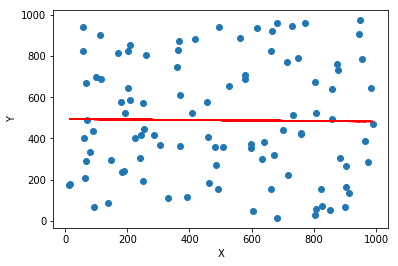

In [40]:
def plot_2D_trendline(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)
    
    # the line equation:
    z = np.polyfit(x_data,y_data,1)
    p = np.poly1d(z)
    plt.plot(x_data,p(x_data),"r--")
    print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
    
    #print Mean Squared Error
    mse = np.mean((p(x_data) - y_data)**2)
    print ("MeanSquaredError: ",mse)
    
    plt.show()

# Let's see if the function works.
plot_2D_trendline(np.random.randint(1000,size=100),np.random.randint(1000,size=100))    

### Problem 3-2 Draw scatter plot and trendline by using infant mortality rate and GDP per capita
- x-axis: *GDP per cap*, y-axis: *infant mortality*
- one plot per 5-year period (total 7 plots)
- The trend line may seem somewhat meaningless, but it isn't problem now.

y=-0.004547x+(79.143060)
MeanSquaredError:  1292.255162782426


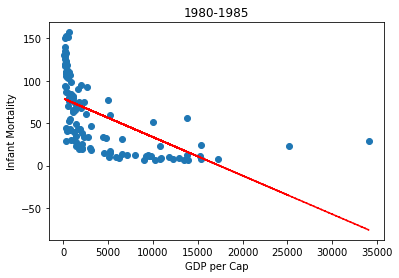

y=-0.003931x+(73.723540)
MeanSquaredError:  1072.4940678533562


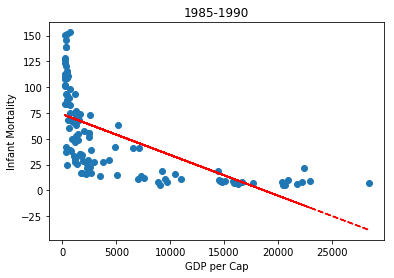

y=-0.002630x+(68.147286)
MeanSquaredError:  1457.335413266694


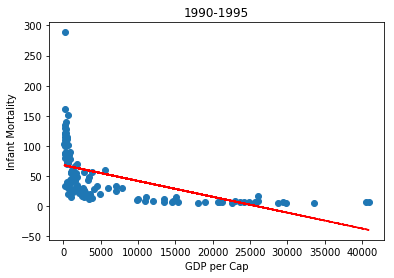

y=-0.002059x+(59.419615)
MeanSquaredError:  881.4741877317291


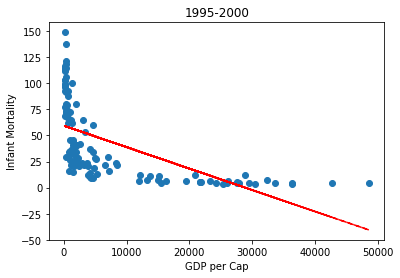

y=-0.001455x+(51.322026)
MeanSquaredError:  742.9847551764249


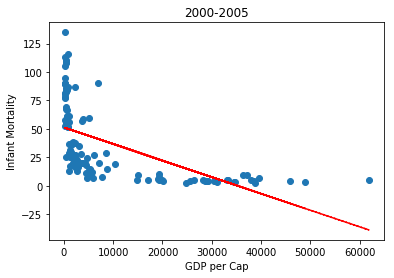

y=-0.000832x+(43.818202)
MeanSquaredError:  585.594938296374


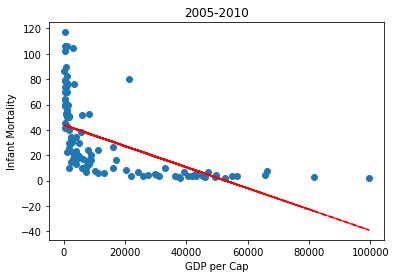

In [50]:
for years in IMtsv.columns:
    xData=[]
    yData=[]

    #TODO
    g = resulttsv[years]
    imtsv = IMtsv[years]
    gdpval = gdp.index.values
    imval = im.index.values
    
    for i in np.intersect1d(gdpval, imval):
        if np.isnan(g[i]) or np.isnan(imtsv[i]): continue
        xData.append(g[i])
        yData.append(imtsv[i])
            
    
    plot_2D_trendline(xData, yData, x_label='GDP per Cap', y_label='Infant Mortality', title=years)
    


### Problem 3-3 Let's make trend line meaningful.
- As mentioned, the trend line is somewhat meaningless.
- By applying a *<b>logarithmic scale</b>* on the data, you can make trendlines more meaningful.
<br/>    ** hint: Most of mathmetical functions in python can be found in numpy.*

y=-0.565511x+(7.938396)
MeanSquaredError:  0.27604512635564915


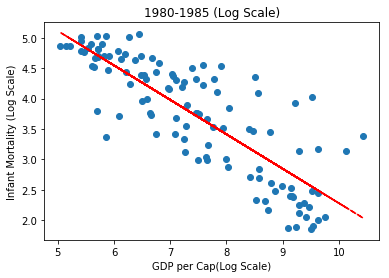

y=-0.606064x+(8.149422)
MeanSquaredError:  0.18954267905092664


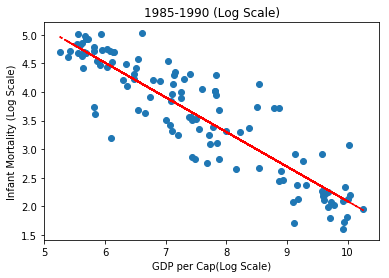

y=-0.585165x+(7.935558)
MeanSquaredError:  0.20034405732412527


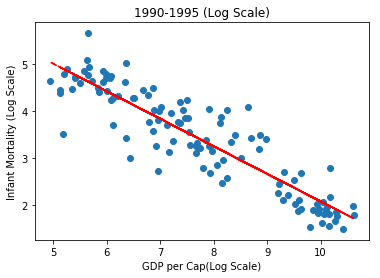

y=-0.614219x+(8.078004)
MeanSquaredError:  0.18191965375378547


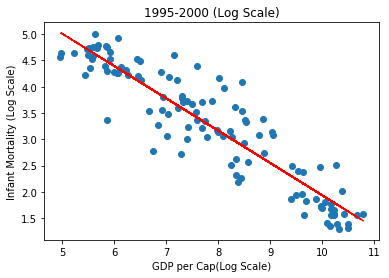

y=-0.604260x+(7.926391)
MeanSquaredError:  0.23023638637237462


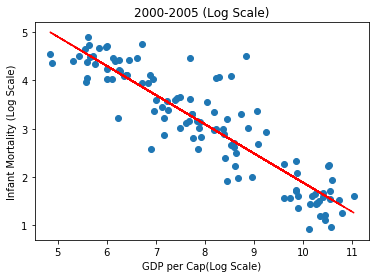

y=-0.616771x+(8.146418)
MeanSquaredError:  0.27505773817697937


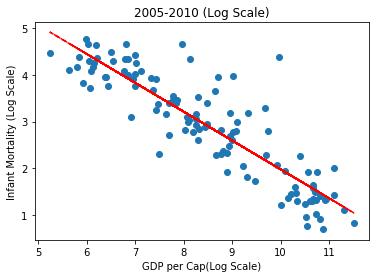

In [48]:
for years in IMtsv.columns:
    xDataLog=[]
    yDataLog=[]
    
    #TODO
    g = resulttsv[years]
    imtsv = IMtsv[years]
    gdpval = gdp.index.values
    imval = im.index.values
    
    for i in np.intersect1d(gdpval, imval):
        if np.isnan(g[i]) or np.isnan(imtsv[i]): continue
        
        xDataLog.append(g[i])
        yDataLog.append(imtsv[i])
            
    xDataLog = np.log(xDataLog)
    yDataLog=np.log(yDataLog)
    
    plot_2D_trendline(xDataLog, yDataLog, x_label='GDP per Cap(Log Scale)', y_label='Infant Mortality (Log Scale)', title=years+" (Log Scale)")

## Project Problem 2&3
- __Read Data forestfires.csv. Keep it mind this data is not tsv!__
- __Sorting & Filtering Data, each sub questions are independent, not related to each other. __
    - Filter rows which event occured in 1st quarter (January to April).
    - Filter rows where area is greater than average area value, and report average value also.
    - Sort descending order by FFMC value which event occured in Friday.
- __Draw plot with following directions, each sub questions are independent, not related to each other.__
    - Draw plot only using X, Y value, so we can know which part of park frequently fired.
    - Draw plot only using temp and wind, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using temp and RH, so we can know the relation between two features. Also draw trend line.
    - Draw plot only using wind and RH, so we can know the relation between two features. Also draw trend line.

In [11]:
###YOUR CODE HERE###
tsv = pd.read_csv('forestfires.csv',index_col=0)
tsv

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00


In [13]:
###YOUR CODE HERE###
month = ['jan','feb','mar','apr']
tsv[tsv.month.isin(month)]

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.00
6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.00
6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0.0,0.00
4,4,mar,tue,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0,0.00
4,4,mar,mon,87.2,23.9,64.7,4.1,11.8,35,1.8,0.0,0.00
4,4,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,0.00


In [16]:
tsvmean = tsv['area'].mean()
print('average of area: ' + str(tsvmean))
tsv.query('area > ' + str(tsvmean))

average of area: 12.847292069632491


,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70
5,6,mar,sat,90.6,50.1,100.4,7.8,15.1,64,4.0,0.0,13.99
4,5,sep,thu,92.9,137.0,706.4,9.2,22.1,34,1.8,0.0,14.57
2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45
7,5,sep,tue,91.0,129.5,692.6,7.0,20.7,37,2.2,0.0,17.20
6,5,sep,fri,92.4,117.9,668.0,12.2,19.6,33,6.3,0.0,19.23
8,3,sep,thu,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,23.41
4,4,oct,sat,90.6,43.7,686.9,6.7,18.4,25,3.1,0.0,24.23


In [52]:
###YOUR CODE HERE###
tsv2 = tsv[tsv.day.isin(['fri'])]
tsv2.sort_values(by=['FFMC'], ascending = False)

AttributeError: 'DataFrame' object has no attribute 'day'

y=0.286800x+(2.960669)
MeanSquaredError:  1.070228545848987


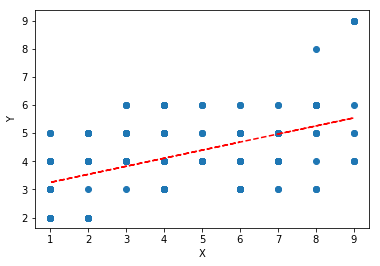

y=-0.070077x+(5.341306)
MeanSquaredError:  3.038551887831039


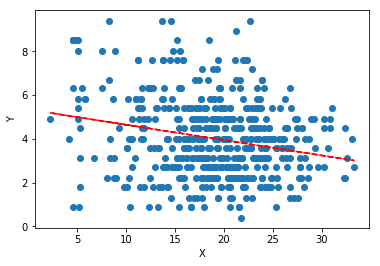

In [68]:
###YOUR CODE HERE###
xData=[]
yData=[]

xData=tsv.index.values
yData = tsv.Y.values

plot_2D_trendline(xData, yData)

xData=[]
yData=[]

xData = tsv.temp.values
yData = tsv.wind.values

plot_2D_trendline(xData, yData)

y=-1.482044x+(72.282784)
MeanSquaredError:  191.83038505390192


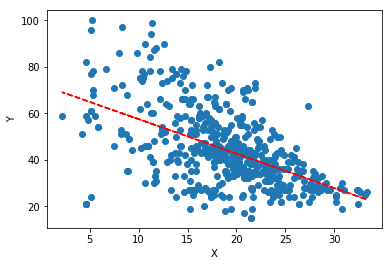

y=0.632152x+(41.748467)
MeanSquaredError:  264.464499139703


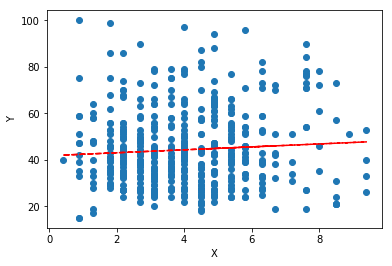

In [69]:
###YOUR CODE HERE###
xData = []
yData = []

xData = tsv.temp.values
yData = tsv.RH.values

plot_2D_trendline(xData,yData)

xData=[]
yData=[]

xData=tsv.wind.values
yData=tsv.RH.values

plot_2D_trendline(xData,yData)

In [70]:
###YOUR CODE HERE###

In [71]:
###YOUR CODE HERE###

# FINISH